In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import datetime as dt
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
data = pd.read_csv('train.csv')
#data = data.drop(['Alley','BsmtExposure','FireplaceQu','PoolQC','MiscFeature','MiscVal','Id','Fence'],axis=1)
#data = data.dropna(axis=0,how='any')
#MsZoingAvg = np.average(Y,weights=data["MSZoning"])
#print(MsZoingAvg)
#plt.plot(X,Y)
#plt.grid(True)
#plt.show()
data = data.drop(data[(data['GrLivArea']>4000) & (data['SalePrice']<300000)].index)
#data[(data['GrLivArea']>4000) & (data['SalePrice']<300000)].index
#data[(data['TotalBsmtSF']>6000) & (data['SalePrice']<300000)].index
#MeanValues = data.mean()

In [3]:
#data[(data['MasVnrType']=='None')]['MasVnrType'].count()
#data['BsmtExposure'].value_counts()
#print(data[(data['BsmtExposure']=='No')]['BsmtExposure'].count())
#print(data['BsmtExposure'].count())

In [4]:
#data['BsmtExposure'].value_counts()
#prob_BsmtExposure = data['BsmtExposure'].value_counts()/(data['BsmtExposure'].count()-data[(data['BsmtExposure']=='No')]['BsmtExposure'].count())
#prob_BsmtExposure['No'] = 0
#prob_BsmtExposure

In [5]:
prob_MSZoning = data['MSZoning'].value_counts()/data['MSZoning'].count()
prob_Street = data['Street'].value_counts()/data['Street'].count()
prob_alley = data['Alley'].value_counts()/data['Alley'].count()
prob_LotShape = data['LotShape'].value_counts()/data['LotShape'].count()
prob_LandContour = data['LandContour'].value_counts()/data['LandContour'].count()
prob_Utilities = data['Utilities'].value_counts()/data['Utilities'].count()
prob_LotConfig = data['LotConfig'].value_counts()/data['LotConfig'].count()
prob_LandSlope = data['LandSlope'].value_counts()/data['LandSlope'].count()
prob_Neighborhood = data['Neighborhood'].value_counts()/data['Neighborhood'].count()
prob_Condition1 = data['Condition1'].value_counts()/data['Condition1'].count()
prob_Condition2 = data['Condition2'].value_counts()/data['Condition2'].count()
prob_BldgType = data['BldgType'].value_counts()/data['BldgType'].count()
prob_HouseStyle = data['HouseStyle'].value_counts()/data['HouseStyle'].count()
prob_RoofStyle = data['RoofStyle'].value_counts()/data['RoofStyle'].count()
prob_RoofMatl = data['RoofMatl'].value_counts()/data['RoofMatl'].count()
prob_Exterior1st = data['Exterior1st'].value_counts()/data['Exterior1st'].count()
prob_Exterior2nd = data['Exterior2nd'].value_counts()/data['Exterior2nd'].count()
prob_MasVnrType = data['MasVnrType'].value_counts()/(data['MasVnrType'].count()-data[(data['MasVnrType']=='None')]['MasVnrType'].count())
prob_MasVnrType['None'] = 0
prob_ExterQual = data['ExterQual'].value_counts()/data['ExterQual'].count()
prob_ExterCond = data['ExterCond'].value_counts()/data['ExterCond'].count()
prob_Foundation = data['Foundation'].value_counts()/data['Foundation'].count()
prob_BsmtQual = data['BsmtQual'].value_counts()/data['BsmtQual'].count()
prob_BsmtCond = data['BsmtCond'].value_counts()/data['BsmtCond'].count()
prob_BsmtExposure = data['BsmtExposure'].value_counts()/(data['BsmtExposure'].count()-data[(data['BsmtExposure']=='No')]['BsmtExposure'].count())
prob_BsmtExposure['No'] = 0
prob_BsmtFinType1 = data['BsmtFinType1'].value_counts()/data['BsmtFinType1'].count()
prob_BsmtFinType2 = data['BsmtFinType2'].value_counts()/data['BsmtFinType2'].count()
prob_Heating = data['Heating'].value_counts()/data['Heating'].count()
prob_HeatingQC = data['HeatingQC'].value_counts()/data['HeatingQC'].count()
prob_Electrical = data['Electrical'].value_counts()/data['Electrical'].count()
prob_KitchenQual = data['KitchenQual'].value_counts()/data['KitchenQual'].count()
prob_Functional = data['Functional'].value_counts()/data['Functional'].count()
prob_FireplaceQu = data['FireplaceQu'].value_counts()/data['FireplaceQu'].count()
prob_GarageType = data['GarageType'].value_counts()/data['GarageType'].count()
prob_GarageFinish = data['GarageFinish'].value_counts()/data['GarageFinish'].count()
prob_GarageQual = data['GarageQual'].value_counts()/data['GarageQual'].count()
prob_GarageCond = data['GarageCond'].value_counts()/data['GarageCond'].count()
prob_PavedDrive = data['PavedDrive'].value_counts()/data['PavedDrive'].count()
prob_PoolQC = data['PoolQC'].value_counts()/data['PoolQC'].count()
prob_Fence = data['Fence'].value_counts()/data['Fence'].count()
prob_MiscFeature = data['MiscFeature'].value_counts()/data['MiscFeature'].count()
prob_SaleType = data['SaleType'].value_counts()/data['SaleType'].count()
prob_SaleCondition = data['SaleCondition'].value_counts()/data['SaleCondition'].count()


In [6]:
data['MSZoning'] = data['MSZoning'].map(prob_MSZoning)
data['Street'] = data['Street'].map(prob_Street)
data['Alley'] = data['Alley'].map(prob_alley)
data['LotShape'] = data['LotShape'].map(prob_LotShape)
data['LandContour'] = data['LandContour'].map(prob_LandContour)
data['Utilities'] = data['Utilities'].map(prob_Utilities)
data['LotConfig'] = data['LotConfig'].map(prob_LotConfig)
data['LandSlope'] = data['LandSlope'].map(prob_LandSlope)
data['Neighborhood'] = data['Neighborhood'].map(prob_Neighborhood)
data['Condition1'] = data['Condition1'].map(prob_Condition1)
data['Condition2'] = data['Condition2'].map(prob_Condition2)
data['BldgType'] = data['BldgType'].map(prob_BldgType)
data['HouseStyle'] = data['HouseStyle'].map(prob_HouseStyle)
data['RoofStyle'] = data['RoofStyle'].map(prob_RoofStyle)
data['RoofMatl'] = data['RoofMatl'].map(prob_RoofMatl)
data['Exterior1st'] = data['Exterior1st'].map(prob_Exterior1st)
data['Exterior2nd'] = data['Exterior2nd'].map(prob_Exterior2nd)
data['MasVnrType'] = data['MasVnrType'].map(prob_MasVnrType)
data['ExterQual'] = data['ExterQual'].map(prob_ExterQual)
data['ExterCond'] = data['ExterCond'].map(prob_ExterCond)
data['Foundation'] = data['Foundation'].map(prob_Foundation)
data['BsmtQual'] = data['BsmtQual'].map(prob_BsmtQual)
data['BsmtCond'] = data['BsmtCond'].map(prob_BsmtCond)
data['BsmtExposure'] = data['BsmtExposure'].map(prob_BsmtExposure)
data['BsmtFinType1'] = data['BsmtFinType1'].map(prob_BsmtFinType1)
data['BsmtFinType2'] = data['BsmtFinType2'].map(prob_BsmtFinType2)
data['Heating'] = data['Heating'].map(prob_Heating)
data['HeatingQC'] = data['HeatingQC'].map(prob_HeatingQC)
data['Electrical'] = data['Electrical'].map(prob_Electrical)
data['KitchenQual'] = data['KitchenQual'].map(prob_KitchenQual)
data['Functional'] = data['Functional'].map(prob_Functional)
data['FireplaceQu'] = data['FireplaceQu'].map(prob_FireplaceQu)
data['GarageType'] = data['GarageType'].map(prob_GarageType)
data['GarageFinish'] = data['GarageFinish'].map(prob_GarageFinish)
data['GarageQual'] = data['GarageQual'].map(prob_GarageQual)
data['GarageCond'] = data['GarageCond'].map(prob_GarageCond)
data['PavedDrive'] = data['PavedDrive'].map(prob_PavedDrive)
data['PoolQC'] = data['PoolQC'].map(prob_PoolQC)
data['Fence'] = data['Fence'].map(prob_Fence)
data['MiscFeature'] = data['MiscFeature'].map(prob_MiscFeature)
data['SaleType'] = data['SaleType'].map(prob_SaleType)
data['SaleCondition'] = data['SaleCondition'].map(prob_SaleCondition)

In [7]:
CentralAir_map = {'Y': 1, 'N': 0}
data['CentralAir'] = data['CentralAir'].map(CentralAir_map)


In [8]:
data.drop('Id',inplace=True,axis=1)


In [9]:
data.fillna(0,inplace=True)
data = data.astype(float,inplace=True)

In [10]:
Y_train =data['SalePrice']

In [11]:
X_train = data.loc[:, data.columns != 'SalePrice']

In [12]:
X_train = X_train.astype(float)

In [40]:
#fifthsubmission
#classifier = linear_model.LogisticRegression(solver='lbfgs',C=1,max_iter=1000,multi_class='multinomial',random_state=1)
#seventhSubmission
#classifier = linear_model.ARDRegression(n_iter=1000)
#eightsubmission
#classifier = linear_model.ARDRegression(n_iter=10000,compute_score=True)
#TenthSubmission
#classifier = linear_model.HuberRegressor(max_iter=10000)
#11
#classifier = linear_model.HuberRegressor(max_iter=10000,alpha=0.5)
#12
#classifier = SVR(kernel='linear',C=100,epsilon=0.01)
#Final
classifier = SVC(gamma='auto',probability=True,C=100,max_iter=50000)

In [41]:
classifier.fit(X_train,Y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=50000, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
testdata = pd.read_csv('test.csv')

In [16]:
testdata['MSZoning'] = testdata['MSZoning'].map(prob_MSZoning)
testdata['Street'] = testdata['Street'].map(prob_Street)
testdata['Alley'] = testdata['Alley'].map(prob_alley)
testdata['LotShape'] = testdata['LotShape'].map(prob_LotShape)
testdata['LandContour'] = testdata['LandContour'].map(prob_LandContour)
testdata['Utilities'] = testdata['Utilities'].map(prob_Utilities)
testdata['LotConfig'] = testdata['LotConfig'].map(prob_LotConfig)
testdata['LandSlope'] = testdata['LandSlope'].map(prob_LandSlope)
testdata['Neighborhood'] = testdata['Neighborhood'].map(prob_Neighborhood)
testdata['Condition1'] = testdata['Condition1'].map(prob_Condition1)
testdata['Condition2'] = testdata['Condition2'].map(prob_Condition2)
testdata['BldgType'] = testdata['BldgType'].map(prob_BldgType)
testdata['HouseStyle'] = testdata['HouseStyle'].map(prob_HouseStyle)
testdata['RoofStyle'] = testdata['RoofStyle'].map(prob_RoofStyle)
testdata['RoofMatl'] = testdata['RoofMatl'].map(prob_RoofMatl)
testdata['Exterior1st'] = testdata['Exterior1st'].map(prob_Exterior1st)
testdata['Exterior2nd'] = testdata['Exterior2nd'].map(prob_Exterior2nd)
testdata['MasVnrType'] = testdata['MasVnrType'].map(prob_MasVnrType)
testdata['ExterQual'] = testdata['ExterQual'].map(prob_ExterQual)
testdata['ExterCond'] = testdata['ExterCond'].map(prob_ExterCond)
testdata['Foundation'] = testdata['Foundation'].map(prob_Foundation)
testdata['BsmtQual'] = testdata['BsmtQual'].map(prob_BsmtQual)
testdata['BsmtCond'] = testdata['BsmtCond'].map(prob_BsmtCond)
testdata['BsmtExposure'] = testdata['BsmtExposure'].map(prob_BsmtExposure)
testdata['BsmtFinType1'] = testdata['BsmtFinType1'].map(prob_BsmtFinType1)
testdata['BsmtFinType2'] = testdata['BsmtFinType2'].map(prob_BsmtFinType2)
testdata['Heating'] = testdata['Heating'].map(prob_Heating)
testdata['HeatingQC'] = testdata['HeatingQC'].map(prob_HeatingQC)
testdata['Electrical'] = testdata['Electrical'].map(prob_Electrical)
testdata['KitchenQual'] = testdata['KitchenQual'].map(prob_KitchenQual)
testdata['Functional'] = testdata['Functional'].map(prob_Functional)
testdata['FireplaceQu'] = testdata['FireplaceQu'].map(prob_FireplaceQu)
testdata['GarageType'] = testdata['GarageType'].map(prob_GarageType)
testdata['GarageFinish'] = testdata['GarageFinish'].map(prob_GarageFinish)
testdata['GarageQual'] = testdata['GarageQual'].map(prob_GarageQual)
testdata['GarageCond'] = testdata['GarageCond'].map(prob_GarageCond)
testdata['PavedDrive'] = testdata['PavedDrive'].map(prob_PavedDrive)
testdata['PoolQC'] = testdata['PoolQC'].map(prob_PoolQC)
testdata['Fence'] = testdata['Fence'].map(prob_Fence)
testdata['MiscFeature'] = testdata['MiscFeature'].map(prob_MiscFeature)
testdata['SaleType'] = testdata['SaleType'].map(prob_SaleType)
testdata['SaleCondition'] = testdata['SaleCondition'].map(prob_SaleCondition)


In [17]:
testdata['CentralAir'] = testdata['CentralAir'].map(CentralAir_map)

In [18]:
y_predictId = testdata['Id'].copy()
testdata.drop('Id',inplace=True,axis=1)

In [19]:
testdata.fillna(0,inplace=True)
testdata = testdata.astype(float)

In [42]:
Y_Predict = classifier.predict(testdata)

In [43]:
classifier.score(X_train,Y_train)

0.9993141289437586

In [44]:
Y_Predict

array([140000., 140000., 140000., ..., 140000., 140000., 140000.])

In [45]:
submit = pd.DataFrame(data = {'Id':y_predictId, 'SalePrice':Y_Predict})

In [46]:
submit.to_csv('FinalSubmission.csv',index=False)

In [46]:
# Implement the following functions

# Activation (sigmoid) function
def sigmoid(x):    
    return (1/(1+np.exp(-x)**2))
    pass

# Output (prediction) formula
def output_formula(features, weights, bias):   
    return sigmoid(np.dot(features,weights) + bias )
    pass

# Error (log-loss) formula
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)
    pass

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    weights = weights + learnrate * (y- output_formula(x,weights,bias)) * x
    bias = bias + learnrate * (y - output_formula(x,weights,bias))
    return weights,bias
    pass

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

In [49]:
epochs = 100
learnrate = 0.5

def train(features, targets, epochs, learnrate, graph_lines=False):    
    errors = []
    n_records, n_features = features.shape
    
    last_loss = None
    weights = np.exp(np.random.normal(scale=1 / n_features**.5, size=n_features))
   
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):         
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    #display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    #plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

C:\Users\jinka\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app



========== Epoch 0 ==========
Train loss:  -inf
Accuracy:  0.0

========== Epoch 10 ==========
Train loss:  -inf
Accuracy:  0.0

========== Epoch 20 ==========
Train loss:  -inf
Accuracy:  0.0

========== Epoch 30 ==========
Train loss:  -inf
Accuracy:  0.0

========== Epoch 40 ==========
Train loss:  -inf
Accuracy:  0.0

========== Epoch 50 ==========
Train loss:  -inf
Accuracy:  0.0

========== Epoch 60 ==========
Train loss:  -inf
Accuracy:  0.0

========== Epoch 70 ==========
Train loss:  -inf
Accuracy:  0.0

========== Epoch 80 ==========
Train loss:  -inf
Accuracy:  0.0

========== Epoch 90 ==========
Train loss:  -inf
Accuracy:  0.0


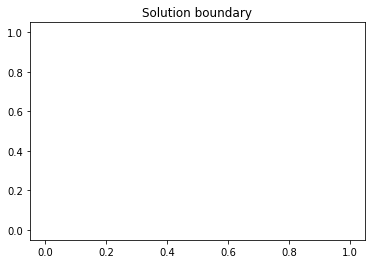

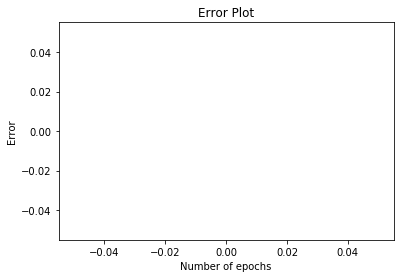

In [50]:
train(X_train.as_matrix(), Y_train.as_matrix(), epochs, learnrate, True)